# ANN Regression

In [51]:
import tensorflow as tf
import numpy as np

## Define data

In [52]:
N = 10000
X = np.random.random((N, 2)) * 6 - 3
# Immpletemts f(x) = cos(2x_1) + cos(3x_2)
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

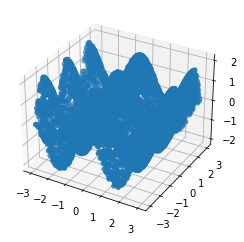

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

## Build the model

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

## Compile and fit

In [55]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
313/313 [==============================] - 0s 1ms/step - loss: 0.8335
Epoch 2/100
313/313 [==============================] - 0s 985us/step - loss: 0.5457
Epoch 3/100
313/313 [==============================] - 0s 866us/step - loss: 0.4975
Epoch 4/100
313/313 [==============================] - 0s 927us/step - loss: 0.3621
Epoch 5/100
313/313 [==============================] - 0s 888us/step - loss: 0.1593
Epoch 6/100
313/313 [==============================] - 0s 872us/step - loss: 0.0482
Epoch 7/100
313/313 [==============================] - 0s 904us/step - loss: 0.0170
Epoch 8/100
313/313 [==============================] - 0s 898us/step - loss: 0.0131
Epoch 9/100
313/313 [==============================] - 0s 898us/step - loss: 0.0137
Epoch 10/100
313/313 [==============================] - 0s 895us/step - loss: 0.0168
Epoch 11/100
313/313 [==============================] - 0s 898us/step - loss: 0.0171
Epoch 12/100
313/313 [==============================] - 0s 882us/step - loss

## Plot the loss

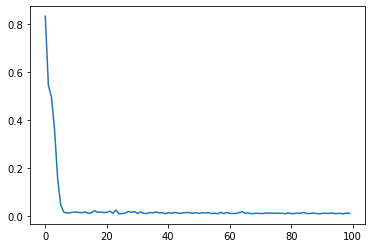

In [60]:
plt.plot(r.history['loss'], label='loss')

## Plot the prediction surface

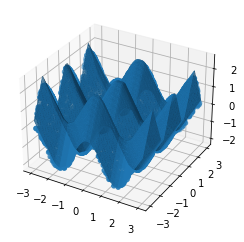

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 100)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

## Can it extrapolate?
### No

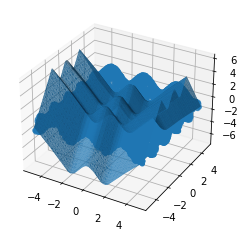

In [64]:
N = 10000
X = np.random.random((N, 2)) * 10 - 5
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)